In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/height-weight.csv')

In [ ]:
df.head()

# head gives the first few rows including the features of the dataset

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

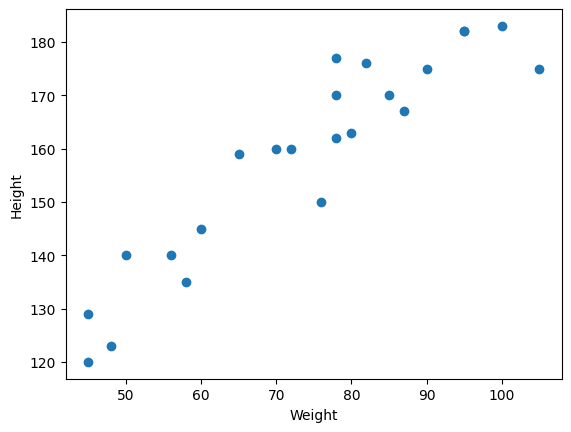

In [ ]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
#correlation
df.corr() #by default givs the pearson correlation

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


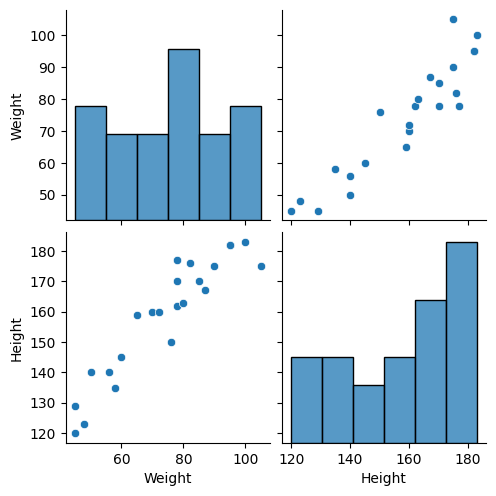

In [ ]:
import seaborn as sns
sns.pairplot(df)
#

In [ ]:
#independant and dependant features
#indep features should be a data frame or a 2D array
X = df[['Weight']]
y = df['Height'] #dpeendant feature should be 1D array

X_series = df['Weight']
# print(type(X))
# print(type(Y))
# type(X)
# print(np.array(X).shape)
# print(np.array(y).shape)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train)
print(y_test)

(18, 1)
12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64
15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64


In [ ]:
# standardization
#convert indep feature with z score and use mean = 0, and standard deviation = 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test) # we dont apply fit transform as we use the mean and sd for the traininig data for the z score
#if we use fit_transform, the mean and sd of the test data will be used for calculating the z score of the test data
#we dont want DATA LEAKAGE
#we dont want training data to learn about test data, there should be no data leakage, the training value only should be known, and the test data should be like a new data
# so we know that model is working fine
#IMPORTANT INTERVIEW QUESTION

[[ 0.21043706]
 [ 0.21043706]
 [-1.6552288 ]
 [ 1.17153765]
 [-0.52452222]]


Text(0, 0.5, 'Height')

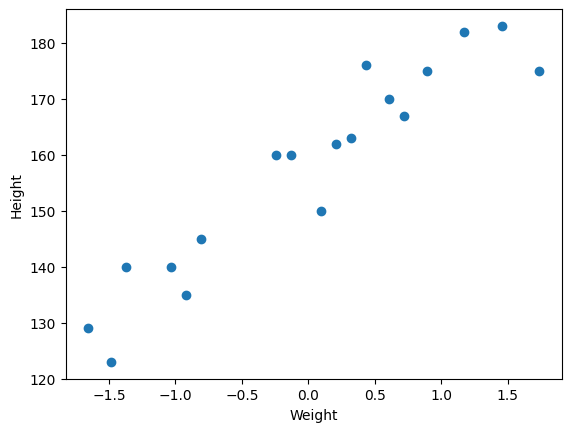

In [ ]:
print(X_test)
plt.scatter(X_train,y_train)
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
#apply simple linear regression

from sklearn.linear_model import LinearRegression
Regression = LinearRegression(n_jobs=-1)
Regression.fit(X_train,y_train)
print("Coefficient/Slope =", Regression.coef_) #this is beta1 value that we discussed in theory
print("Intercept=", Regression.intercept_) #this is beta0 value that we discussed in theory

Coefficient/Slope = [17.7307072]
Intercept= 160.0


Text(0, 0.5, 'Height')

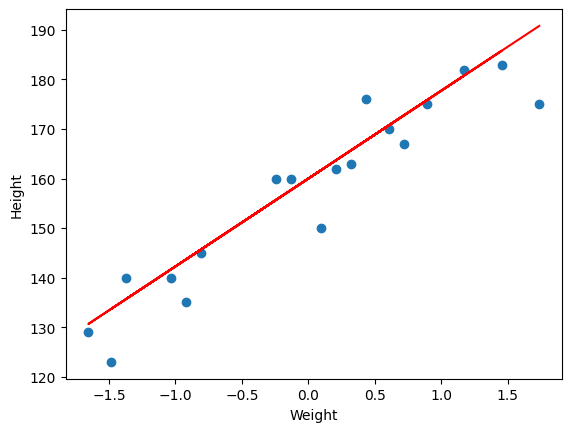

In [ ]:
#plot training data best fit line

plt.scatter(X_train,y_train)
plt.plot(X_train,Regression.predict(X_train),color='red')

plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
#prediction for the test data
# 1. predicted height output = intercept + coeff(weight)
# 2. y_pred_test = 160 + 17.73 (X_test)
y_pred = Regression.predict(X_test)

In [ ]:
#performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

79.84321237335759
7.943437181336026
8.935502916644232


In [ ]:
# R^2 = 1-SSR/SST
# R2 = coeff of determination
# SST = sum of sq o residuals
# SST = sum of sq of squared error

score = r2_score(y_test,y_pred)
print(score)

0.8377961718402455


In [ ]:


# #adj R score
# R2 = 1-[(1-R2)(n-1)/(n-k-1)]
# R2 = R2 score of the model
# n = number of observations
# k = number of predictor variables
print(1 - (1-score) * (len(y_test)-1) / (len(y_test)- X_test.shape[1] - 1 ))

0.7837282291203272


In [ ]:
#OLS lin regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [ ]:
print(model.predict(X_test))

[  3.58467086   3.58467086 -28.1958439   19.95645118  -8.93492586]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                       0.661
Time:                        11:28:07   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#prediction for new data

In [ ]:
# Regression.predict([[72]])
Regression.predict(scaler.transform([[72]]))
# scaler.transform the new data, otherwise youll get a huge value

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([157.71672967])